In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

C:\Users\Shuba\AppData\Local\Temp\ipykernel_20324\1287895356.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df=pd.read_csv(r"C:\Users\Shuba\Downloads\insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<Axes: >

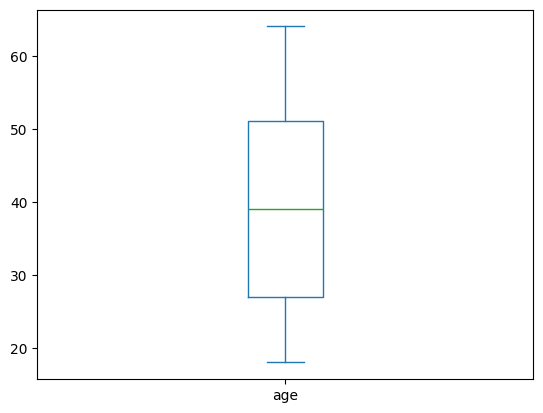

In [5]:
df["age"].plot.box()

<Axes: ylabel='Frequency'>

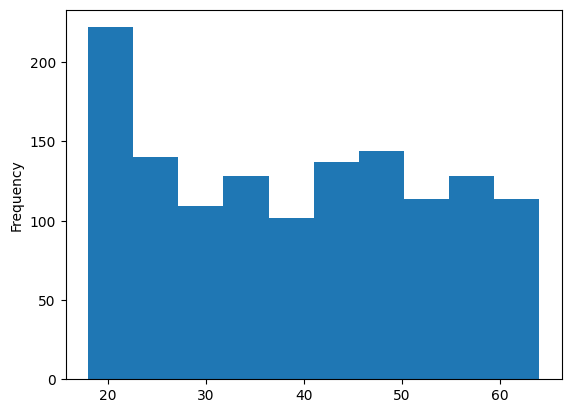

In [6]:
df["age"].plot.hist()

In [8]:
df[["age","charges"]].corr(method="pearson")

,age,charges
age,1.000000,0.299008
charges,0.299008,1.000000


In [9]:
df[["age","charges"]].corr(method="pearson")

,age,charges
age,1.000000,0.299008
charges,0.299008,1.000000


In [10]:
df[["bmi","charges"]].corr(method="pearson")

,bmi,charges
bmi,1.000000,0.198341
charges,0.198341,1.000000


In [12]:
df.groupby("sex")["charges"].mean()

sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64

In [13]:
df["children"].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [14]:
df[["children","charges"]].corr(method="pearson")

,children,charges
children,1.000000,0.067998
charges,0.067998,1.000000


In [16]:
df.groupby("smoker")["charges"].mean()

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

In [17]:
df.groupby("region")["charges"].mean()

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

In [18]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Axes: >

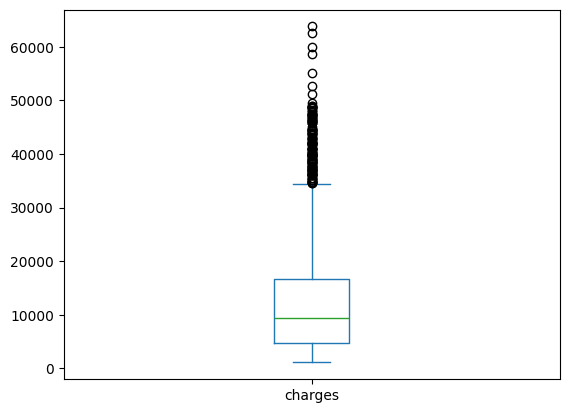

In [21]:
df["charges"].plot.box()

In [22]:
df["charges"].quantile(0.9)

34831.7197

In [23]:
dummies=pd.get_dummies(df[["sex","smoker","region"]],drop_first=True,dtype=float)

In [24]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [25]:
new_df=pd.concat([df,dummies],axis=1)

In [26]:
new_df.head()

,age,sex,bmi,children,smoker,region,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0.0,1.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,1.0,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,1.0,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,1.0,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,1.0,0.0,1.0,0.0,0.0


In [29]:
new_df.drop(["sex","smoker","region"],axis=1,inplace=True)

In [30]:
new_df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0.0,1.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,1.0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,1.0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,1.0,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,1.0,0.0,1.0,0.0,0.0


In [31]:
X=new_df.drop(["charges"],axis=1)
y=new_df["charges"]

In [32]:
X.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0.0,1.0,0.0,0.0,1.0
1,18,33.770,1,1.0,0.0,0.0,1.0,0.0
2,28,33.000,3,1.0,0.0,0.0,1.0,0.0
3,33,22.705,0,1.0,0.0,1.0,0.0,0.0
4,32,28.880,0,1.0,0.0,1.0,0.0,0.0


In [34]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=345)

In [36]:
y_train

1276     2741.94800
1105    10338.93160
101      3645.08940
1058     2480.97910
55      47496.49445
           ...     
554     17878.90068
413      5080.09600
649     12430.95335
207     20984.09360
595      8823.98575
Name: charges, Length: 1003, dtype: float64

In [37]:
model=LinearRegression()


In [38]:
model.fit(X_train,y_train)

LinearRegression()

In [40]:
y_pred=model.predict(X_test)

In [41]:
r2_score(y_test,y_pred)

0.771060830015067

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
scaler=StandardScaler()

In [46]:
X=scaler.fit_transform(X)

In [47]:
X

array([[-1.43876426, -0.45332   , -0.90861367, ..., -0.56641788,
        -0.61132367,  1.76548098],
       [-1.50996545,  0.5096211 , -0.07876719, ..., -0.56641788,
         1.63579466, -0.56641788],
       [-0.79795355,  0.38330685,  1.58092576, ..., -0.56641788,
         1.63579466, -0.56641788],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367, ..., -0.56641788,
         1.63579466, -0.56641788],
       [-1.29636188, -0.79781341, -0.90861367, ..., -0.56641788,
        -0.61132367,  1.76548098],
       [ 1.55168573, -0.26138796, -0.90861367, ...,  1.76548098,
        -0.61132367, -0.56641788]])